In [1]:
import pandas as pd

df= pd.read_csv("Korea_Stocks_Kospi.csv", index_col=0) 
df.head()

,name,adj_close,open,high,low,close,differ,avg,volume,date,year,month,day,dayofweek
0,70,74031,84000,84000,79000,82300,1700,2500.0,71250,2011-12-05,2011,12,5,0
1,70,72322,81000,82000,72900,80400,600,4550.0,75973,2011-12-06,2011,12,6,1
2,70,75381,80500,85800,78300,83800,-3300,3750.0,70873,2011-12-07,2011,12,7,2
3,70,71063,83000,83800,78600,79000,4000,2600.0,77794,2011-12-08,2011,12,8,3
4,70,68184,77500,77500,75200,75800,1700,1150.0,54451,2011-12-09,2011,12,9,4


In [2]:
#용량 줄이는 코드
import numpy as np

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df
df = reduce_mem_usage(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807311 entries, 0 to 807310
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   name       807311 non-null  int32  
 1   adj_close  807311 non-null  int32  
 2   open       807311 non-null  int32  
 3   high       807311 non-null  int32  
 4   low        807311 non-null  int32  
 5   close      807311 non-null  int32  
 6   differ     807311 non-null  int32  
 7   avg        807311 non-null  float32
 8   volume     807311 non-null  int64  
 9   date       807311 non-null  object 
 10  year       807311 non-null  int16  
 11  month      807311 non-null  int8   
 12  day        807311 non-null  int8   
 13  dayofweek  807311 non-null  int8   
dtypes: float32(1), int16(1), int32(7), int64(1), int8(3), object(1)
memory usage: 47.0+ MB


## 전처리

In [3]:
#주요 시계열 데이터
dfdf=df[["name", "adj_close", "date"]]
dfdf.head()

,name,adj_close,date
0,70,74031,2011-12-05
1,70,72322,2011-12-06
2,70,75381,2011-12-07
3,70,71063,2011-12-08
4,70,68184,2011-12-09


In [4]:
#혹시 모르는 결측치처리, 피봇테이블로 변환
#날짜 기준으로 크루핌하여 수정주가를 열로
new_df = dfdf.pivot_table('adj_close', index = 'date', columns='name').fillna(0)
new_df.head()

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.0,3338.0,23510.0,0.0,20558.0,9641.0,35.0,6111.0,0.0,307182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,3097.0,23074.0,0.0,20789.0,8941.0,33.0,5778.0,0.0,275569.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,3105.0,21562.0,0.0,19557.0,8475.0,31.0,5529.0,0.0,261254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,2957.0,22570.0,0.0,19980.0,8630.0,32.0,5404.0,0.0,258868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,0.0,3179.0,22738.0,0.0,19826.0,8552.0,35.0,5653.0,0.0,256482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#행 <-> 열
new_df_T = new_df.T
new_df_T

date,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,2000-01-17,...,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16
name,,,,,,,,,,,,,,,,,,,,,
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91700.0,92100.0,91200.0,91400.0,91700.0,91300.0,91500.0,92700.0,97700.0,98200.0
80,3338.0,3097.0,3105.0,2957.0,3179.0,3253.0,3223.0,3171.0,3216.0,3356.0,...,36250.0,36650.0,36350.0,35500.0,35900.0,36200.0,36100.0,35550.0,35100.0,35350.0
100,23510.0,23074.0,21562.0,22570.0,22738.0,22906.0,22368.0,21965.0,21965.0,22167.0,...,62800.0,61800.0,62700.0,62300.0,63100.0,65800.0,65900.0,64600.0,65800.0,67000.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180500.0,183500.0,183000.0,179000.0,178000.0,178000.0,175000.0,176000.0,174500.0,179500.0
150,20558.0,20789.0,19557.0,19980.0,19826.0,19557.0,20019.0,18556.0,19480.0,19172.0,...,49750.0,49750.0,50300.0,49700.0,49500.0,49500.0,49250.0,49900.0,51600.0,52000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159000.0,160500.0,161000.0,159000.0,162000.0,163500.0,162000.0,162500.0,159500.0,0.0
284740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42000.0,41700.0,42300.0,42000.0,41900.0,41950.0,42400.0,43900.0,43600.0,0.0
285130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259000.0,251000.0,250000.0,255000.0,260000.0,263500.0,256797.0,277000.0,274500.0,0.0


## 2차

### 코사인 유사도

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

item_cs = cosine_similarity(new_df_T, new_df_T)
item_cs_df = pd.DataFrame(data=item_cs, index=new_df.columns, columns=new_df.columns)
item_cs_df.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,1.000000,0.791763,0.821026,0.925223,0.726592,0.664923,0.933693,0.783165,0.947088,0.499228,...,0.610596,0.620417,0.557153,0.502319,0.519295,0.482237,0.426374,0.351032,0.413909,0.329759
80,0.791763,1.000000,0.808120,0.916909,0.811538,0.794930,0.847003,0.916477,0.776778,0.578198,...,0.617305,0.618074,0.594399,0.526462,0.605723,0.538460,0.366986,0.497780,0.455763,0.495013
100,0.821026,0.808120,1.000000,0.870225,0.929466,0.909019,0.843519,0.843777,0.794607,0.556041,...,0.556667,0.556655,0.500666,0.474268,0.469280,0.472010,0.412863,0.236742,0.418981,0.333826
120,0.925223,0.916909,0.870225,1.000000,0.810385,0.769655,0.943529,0.881182,0.914878,0.564092,...,0.673638,0.670276,0.622278,0.563583,0.609875,0.565910,0.446658,0.445063,0.507884,0.461181
150,0.726592,0.811538,0.929466,0.810385,1.000000,0.948878,0.784406,0.872450,0.683772,0.536640,...,0.493887,0.487727,0.450917,0.417706,0.418906,0.399721,0.356669,0.233149,0.353362,0.263479
210,0.664923,0.794930,0.909019,0.769655,0.948878,1.000000,0.722139,0.866025,0.634481,0.536193,...,0.501452,0.493418,0.464332,0.424136,0.459373,0.439641,0.336229,0.321299,0.392930,0.364906
240,0.933693,0.847003,0.843519,0.943529,0.784406,0.722139,1.000000,0.835668,0.950444,0.541173,...,0.652347,0.655236,0.598685,0.540232,0.566918,0.523517,0.435399,0.398800,0.456831,0.392521
270,0.783165,0.916477,0.843777,0.881182,0.872450,0.866025,0.835668,1.000000,0.738851,0.560153,...,0.507508,0.500090,0.471428,0.421070,0.474507,0.444453,0.309068,0.416684,0.394585,0.403748


In [7]:
#예시로 20000과 비슷한 종목추천
#1에 수렴할수록 더 비슷함!
item_cs_df[20000].sort_values(ascending=False)[1:6]

name
35250    0.981656
12750    0.978017
10130    0.973473
5830     0.970318
33780    0.968675
Name: 20000, dtype: float64

In [8]:
new_df = dfdf.pivot_table('adj_close', index = 'date', columns='name').fillna(0)
new_df.head()

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.0,3338.0,23510.0,0.0,20558.0,9641.0,35.0,6111.0,0.0,307182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,3097.0,23074.0,0.0,20789.0,8941.0,33.0,5778.0,0.0,275569.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,3105.0,21562.0,0.0,19557.0,8475.0,31.0,5529.0,0.0,261254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,2957.0,22570.0,0.0,19980.0,8630.0,32.0,5404.0,0.0,258868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,0.0,3179.0,22738.0,0.0,19826.0,8552.0,35.0,5653.0,0.0,256482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='date'>

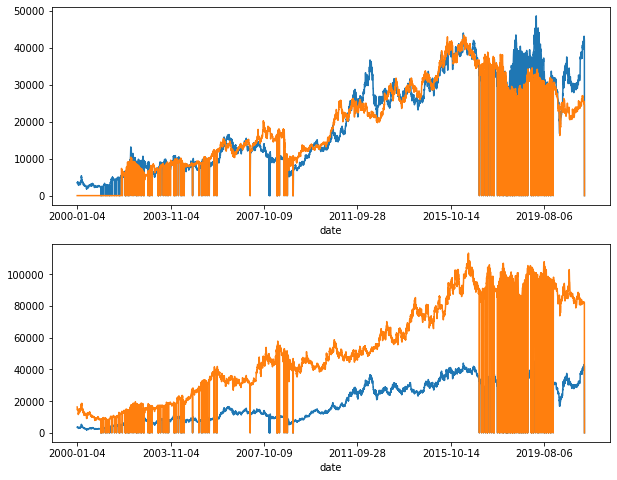

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[20000].plot()
new_df[35250].plot()

plt.subplot(212)
new_df[20000].plot()
new_df[12750].plot()

In [10]:
item_cs_df[35720].sort_values(ascending=False)[1:6]

name
6400     0.953749
11790    0.949308
51910    0.935552
36570    0.932560
6280     0.915330
Name: 35720, dtype: float64

<AxesSubplot:xlabel='date'>

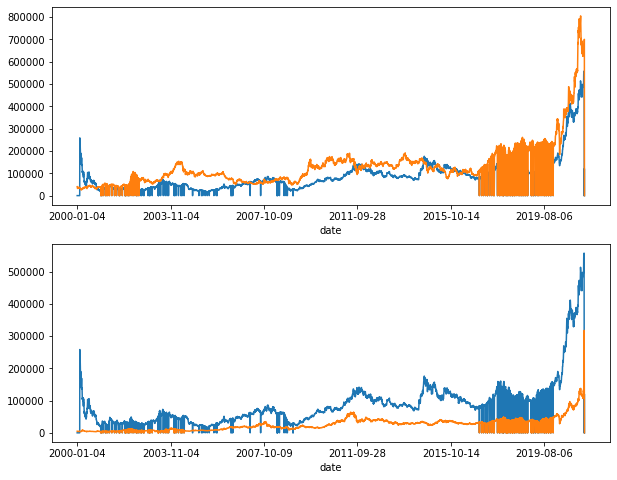

In [11]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[35720].plot()
new_df[6400].plot()

plt.subplot(212)
new_df[35720].plot()
new_df[11790].plot()

### 유클리드 거리

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
pd.options.display.float_format = '{:.2f}'.format
item_ed = euclidean_distances(new_df_T, new_df_T)
item_ed_df = pd.DataFrame(data=item_ed, index=new_df.columns, columns=new_df.columns)
item_ed_df.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,0.00,3830099.45,7610208.61,3744792.27,4247336.58,4333926.66,3998295.17,3188477.01,2061062.12,4789472.79,...,4216216.91,4487814.86,4206461.16,9274574.75,4212311.61,4999715.79,4574112.78,5732097.90,4479111.40,4712707.49
80,3830099.45,0.00,9997199.89,6515863.11,5150797.82,4649709.95,748591.43,1499706.30,4953266.17,4158992.66,...,1074299.35,1081318.07,3419837.92,10071553.89,2877535.00,4457335.29,3262667.99,4733280.33,1229869.79,1215989.37
100,7610208.61,9997199.89,0.00,5757738.40,5771632.21,6364908.94,10318845.49,8939556.13,7284112.31,9271320.22,...,10469506.93,10755442.08,9667640.59,11149551.08,9891512.89,9730051.79,10105157.26,11041029.48,10668170.61,10952586.45
120,3744792.27,6515863.11,5757738.40,0.00,4515878.59,4929406.59,6899665.36,5541981.28,3313900.81,6378052.71,...,7021015.94,7369476.82,6080166.01,8999545.56,6228146.39,6388551.18,6895270.12,7137164.68,7265747.55,7592310.16
150,4247336.58,5150797.82,5771632.21,4515878.59,0.00,1958333.32,5515563.32,4088801.60,4807087.95,5406665.60,...,5707614.06,5930011.79,5644416.00,9872346.18,5669531.63,6205428.45,5906456.58,7105071.29,5894657.68,6103068.27
210,4333926.66,4649709.95,6364908.94,4929406.59,1958333.32,0.00,5044087.85,3611274.89,4939951.18,5068922.09,...,5172313.88,5394161.77,5185596.22,9755149.98,5080476.75,5664860.96,5543099.32,6346167.56,5327009.54,5542877.27
240,3998295.17,748591.43,10318845.49,6899665.36,5515563.32,5044087.85,0.00,1953144.47,5097968.69,4375242.46,...,837016.69,652313.42,3587431.97,10264847.77,3073808.08,4635214.08,3226732.01,4969989.75,953327.92,796538.18
270,3188477.01,1499706.30,8939556.13,5541981.28,4088801.60,3611274.89,1953144.47,0.00,4350423.80,3961024.24,...,2265866.87,2398147.54,3629979.93,9892043.52,3210576.28,4519803.37,3669976.90,4791866.79,2403629.93,2522690.53


In [13]:
#0에 수렴할수록 더 비슷함!
item_ed_df[20000].sort_values(ascending=True)[1:6]

name
35250   324497.79
1450    489934.55
1680    615976.48
69260   673997.57
9830    700198.55
Name: 20000, dtype: float64

<AxesSubplot:xlabel='date'>

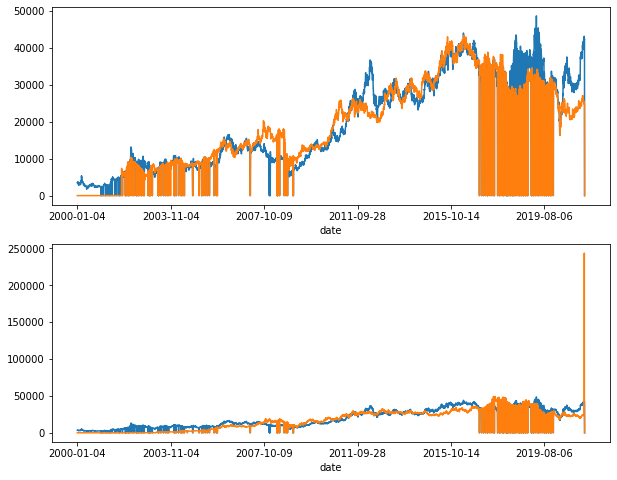

In [14]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[20000].plot()
new_df[35250].plot()

plt.subplot(212)
new_df[20000].plot()
new_df[1450].plot()

In [15]:
item_ed_df[35720].sort_values(ascending=True)[1:6]

name
6280    3755225.82
9150    4229703.07
11070   4476415.80
11780   4685308.85
68270   4712554.73
Name: 35720, dtype: float64

<AxesSubplot:xlabel='date'>

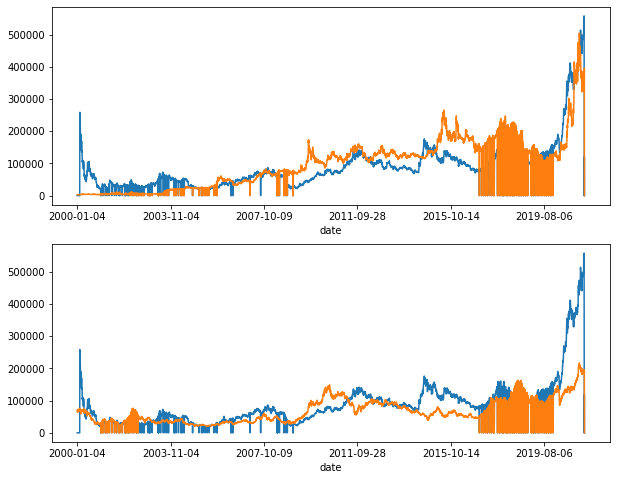

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[35720].plot()
new_df[6280].plot()

plt.subplot(212)
new_df[35720].plot()
new_df[9150].plot()

### 맨해튼 거리

In [17]:
from sklearn.metrics.pairwise import manhattan_distances
pd.options.display.float_format = '{:.2f}'.format
item_mt = manhattan_distances(new_df_T, new_df_T)
item_mt_df = pd.DataFrame(data=item_mt, index=new_df.columns, columns=new_df.columns)
item_mt_df.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,0.00,176272535.00,489200283.00,184991462.00,225247379.00,240340172.00,177768329.00,157268883.00,87649302.00,217782144.00,...,179628789.00,198153766.00,174209760.00,391997177.00,170198077.00,225278925.00,194303277.00,213532390.00,191196553.00,209162297.00
80,176272535.00,0.00,628402520.00,328870847.00,305772384.00,292070937.00,31994574.00,87313964.00,231504177.00,165472903.00,...,54969232.00,53992253.00,142951047.00,348984664.00,126703364.00,169104212.00,107516764.00,140463945.00,64403940.00,64709084.00
100,489200283.00,628402520.00,0.00,362866571.00,330085416.00,357829399.00,656986632.00,547369848.00,468439635.00,590052343.00,...,663531196.00,682002373.00,610240599.00,709196584.00,629726082.00,598891928.00,621851484.00,699918195.00,675079560.00,692983444.00
120,184991462.00,328870847.00,362866571.00,0.00,241656745.00,279440810.00,355580201.00,286090471.00,159426752.00,345467172.00,...,360295965.00,378939742.00,280083570.00,442874353.00,291352653.00,296091101.00,341757253.00,352138766.00,371934529.00,389900273.00
150,225247379.00,305772384.00,330085416.00,241656745.00,0.00,122681279.00,334273368.00,228946176.00,259169679.00,291897919.00,...,340642860.00,359323237.00,329957397.00,546626202.00,330943514.00,381338914.00,348607514.00,386030639.00,352306624.00,370166968.00
210,240340172.00,292070937.00,357829399.00,279440810.00,122681279.00,0.00,320806369.00,209888971.00,292511368.00,265614480.00,...,327202913.00,345816090.00,319284284.00,534983501.00,310404001.00,362095449.00,350753401.00,358655736.00,338770677.00,356736421.00
240,177768329.00,31994574.00,656986632.00,355580201.00,334273368.00,320806369.00,0.00,112426336.00,224080121.00,189634331.00,...,40598802.00,26957561.00,132408855.00,337857672.00,116029072.00,157363920.00,94973572.00,128764453.00,44121296.00,36007052.00
270,157268883.00,87313964.00,547369848.00,286090471.00,228946176.00,209888971.00,112426336.00,0.00,234680353.00,149717981.00,...,120463570.00,137484057.00,198052113.00,406542630.00,182974530.00,227291778.00,175262498.00,198983611.00,137693574.00,148356388.00


In [18]:
#0에 수렴할수록 더 비슷함!
item_mt_df[20000].sort_values(ascending=True)[1:6]

name
35250   16320436.00
1450    27067584.00
1680    36843555.00
9830    38043045.00
69260   39851265.00
Name: 20000, dtype: float64

<AxesSubplot:xlabel='date'>

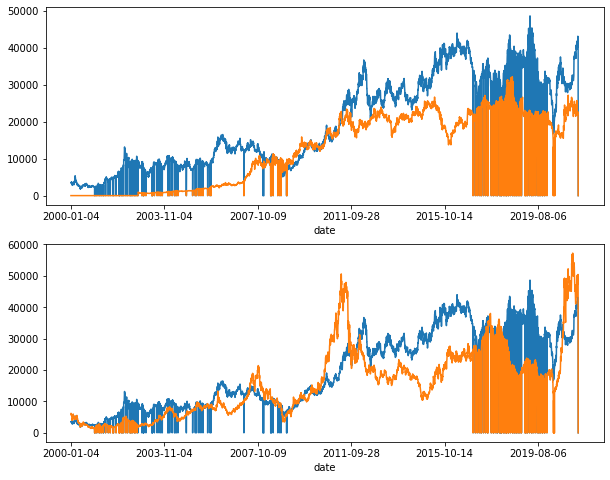

In [19]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[20000].plot()
new_df[69260].plot()
plt.subplot(212)
new_df[20000].plot()
new_df[9830].plot()

In [20]:
item_mt_df[35720].sort_values(ascending=True)[1:6]

name
9150    180393556.00
10950   204515804.00
33780   205949353.00
12750   208477023.00
6280    211046025.00
Name: 35720, dtype: float64

<AxesSubplot:xlabel='date'>

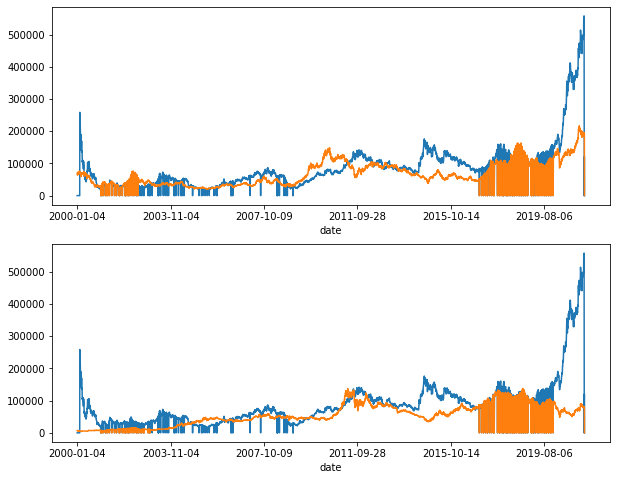

In [21]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[35720].plot()
new_df[9150].plot()

plt.subplot(212)
new_df[35720].plot()
new_df[10950].plot()

## 3차

0으로 변환된 결측치를 중앙값으로 대체하여 진행.

In [22]:
len(dfdf['name'].value_counts())

200

In [23]:
len(dfdf['date'].value_counts())

5432

In [24]:
len(new_df.columns)

200

In [25]:
mid_df=new_df.copy()

for i in range(len(mid_df.columns)):
    for j in range(1, len(mid_df.index)-1):
        if mid_df.iloc[j, i] == 0:
            mid_df.iloc[j, i] = (mid_df.iloc[j-1, i] + mid_df.iloc[j-1, i])/2

In [26]:
mid_df.head()

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.00,3338.00,23510.00,0.00,20558.00,9641.00,35.00,6111.00,0.00,307182.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000-01-05,0.00,3097.00,23074.00,0.00,20789.00,8941.00,33.00,5778.00,0.00,275569.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000-01-06,0.00,3105.00,21562.00,0.00,19557.00,8475.00,31.00,5529.00,0.00,261254.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000-01-07,0.00,2957.00,22570.00,0.00,19980.00,8630.00,32.00,5404.00,0.00,258868.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000-01-10,0.00,3179.00,22738.00,0.00,19826.00,8552.00,35.00,5653.00,0.00,256482.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [27]:
mid_df.tail()

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
date,,,,,,,,,,,,,,,,,,,,,
2021-04-12,91300.00,36200.00,65800.00,178000.00,49500.00,84800.00,18450.00,84300.00,117000.00,137500.00,...,41150.00,19250.00,140000.00,56600.00,127500.00,163500.00,41950.00,263500.00,28450.00,10400.00
2021-04-13,91500.00,36100.00,65900.00,175000.00,49250.00,85200.00,18700.00,85500.00,114500.00,139500.00,...,41450.00,18550.00,138500.00,58700.00,127500.00,162000.00,42400.00,256797.00,27950.00,10350.00
2021-04-14,92700.00,35550.00,64600.00,176000.00,49900.00,89600.00,19000.00,86000.00,118000.00,137000.00,...,41550.00,18250.00,141500.00,59400.00,127500.00,162500.00,43900.00,277000.00,28500.00,10400.00
2021-04-15,97700.00,35100.00,65800.00,174500.00,51600.00,91200.00,18900.00,85200.00,120000.00,137500.00,...,42000.00,18400.00,141000.00,59500.00,123000.00,159500.00,43600.00,274500.00,28200.00,10400.00
2021-04-16,98200.00,35350.00,67000.00,179500.00,52000.00,92000.00,18600.00,86900.00,0.00,137500.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:xlabel='date'>

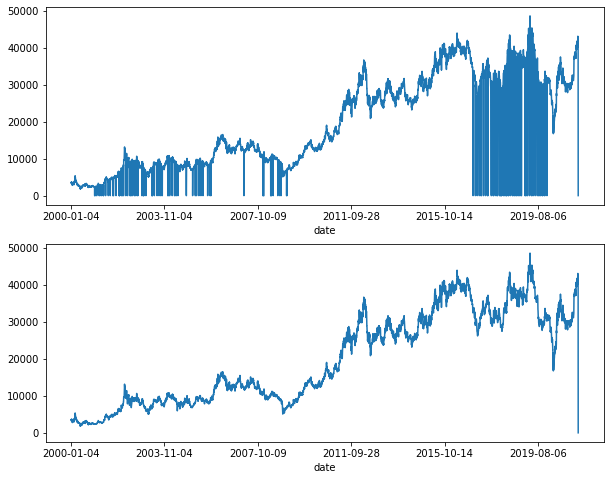

In [28]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
new_df[20000].plot()
plt.subplot(212)
mid_df[20000].plot()

In [29]:
mid_df=mid_df.iloc[:5431 , :]

In [30]:
mid_df_T = mid_df.T
mid_df_T.head()

date,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,2000-01-17,...,2021-04-02,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15
name,,,,,,,,,,,,,,,,,,,,,
70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,91900.00,91700.00,92100.00,91200.00,91400.00,91700.00,91300.00,91500.00,92700.00,97700.00
80,3338.00,3097.00,3105.00,2957.00,3179.00,3253.00,3223.00,3171.00,3216.00,3356.00,...,36500.00,36250.00,36650.00,36350.00,35500.00,35900.00,36200.00,36100.00,35550.00,35100.00
100,23510.00,23074.00,21562.00,22570.00,22738.00,22906.00,22368.00,21965.00,21965.00,22167.00,...,63200.00,62800.00,61800.00,62700.00,62300.00,63100.00,65800.00,65900.00,64600.00,65800.00
120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,182000.00,180500.00,183500.00,183000.00,179000.00,178000.00,178000.00,175000.00,176000.00,174500.00
150,20558.00,20789.00,19557.00,19980.00,19826.00,19557.00,20019.00,18556.00,19480.00,19172.00,...,49300.00,49750.00,49750.00,50300.00,49700.00,49500.00,49500.00,49250.00,49900.00,51600.00


### 코사인 유사도

In [31]:
item_cs1 = cosine_similarity(mid_df_T, mid_df_T)
item_cs_df1 = pd.DataFrame(data=item_cs1, index=mid_df.columns, columns=mid_df.columns)
item_cs_df1.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,1.00,0.79,0.82,0.89,0.73,0.67,0.94,0.79,0.95,0.51,...,0.63,0.63,0.57,0.62,0.54,0.50,0.45,0.36,0.42,0.33
80,0.79,1.00,0.84,0.89,0.83,0.83,0.85,0.93,0.78,0.59,...,0.63,0.63,0.60,0.60,0.61,0.55,0.38,0.50,0.46,0.49
100,0.82,0.84,1.00,0.89,0.93,0.91,0.85,0.85,0.80,0.57,...,0.58,0.57,0.52,0.58,0.49,0.49,0.44,0.25,0.43,0.35
120,0.89,0.89,0.89,1.00,0.83,0.77,0.91,0.86,0.88,0.56,...,0.66,0.66,0.61,0.64,0.60,0.56,0.45,0.44,0.50,0.45
150,0.73,0.83,0.93,0.83,1.00,0.95,0.79,0.87,0.69,0.55,...,0.51,0.51,0.47,0.51,0.44,0.42,0.38,0.24,0.37,0.27
210,0.67,0.83,0.91,0.77,0.95,1.00,0.73,0.87,0.64,0.54,...,0.52,0.51,0.48,0.50,0.47,0.45,0.36,0.33,0.40,0.37
240,0.94,0.85,0.85,0.91,0.79,0.73,1.00,0.84,0.95,0.55,...,0.67,0.67,0.61,0.65,0.58,0.54,0.46,0.41,0.46,0.40
270,0.79,0.93,0.85,0.86,0.87,0.87,0.84,1.00,0.74,0.57,...,0.52,0.51,0.48,0.49,0.48,0.45,0.33,0.42,0.40,0.41


In [32]:
item_cs_df1[20000].sort_values(ascending=False)[1:6]

name
35250   0.98
12750   0.98
10130   0.97
33780   0.97
5830    0.97
Name: 20000, dtype: float64

<AxesSubplot:xlabel='date'>

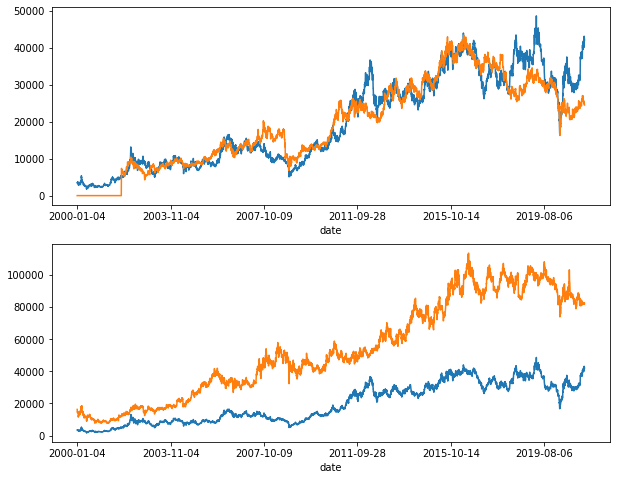

In [33]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
mid_df[20000].plot()
mid_df[35250].plot()

plt.subplot(212)
mid_df[20000].plot()
mid_df[12750].plot()

In [34]:
item_cs_df1[35720].sort_values(ascending=False)[1:6]

name
11790   0.96
6400    0.96
51910   0.94
36570   0.93
6280    0.92
Name: 35720, dtype: float64

<AxesSubplot:xlabel='date'>

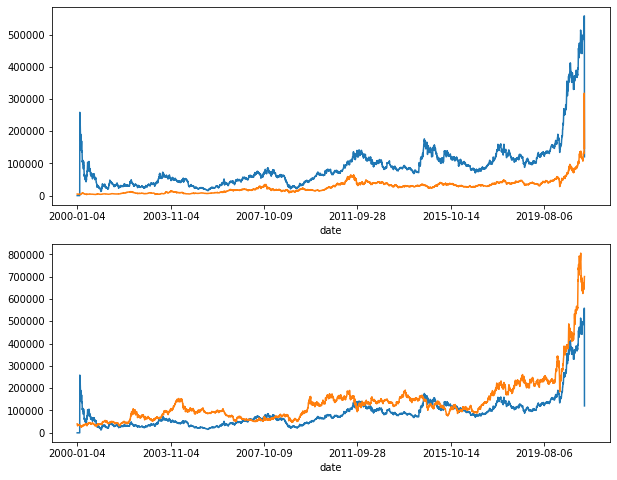

In [35]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
mid_df[35720].plot()
mid_df[11790].plot()

plt.subplot(212)
mid_df[35720].plot()
mid_df[6400].plot()

### 유클리드 거리

In [36]:
item_ed1 = euclidean_distances(mid_df_T, mid_df_T)
item_ed_df1 = pd.DataFrame(data=item_ed1, index=mid_df.columns, columns=mid_df.columns)
item_ed_df1.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,0.00,3890366.66,7734183.31,4354666.63,4262229.63,4340098.85,4059831.48,3236802.43,2067991.44,4803934.88,...,4250572.55,4545575.06,4232505.45,9667410.42,4226764.35,5090892.03,4647368.21,5755430.21,4537935.00,4786394.60
80,3890366.66,0.00,10147318.70,6954914.75,5191622.85,4635956.97,753165.99,1481246.92,5021997.85,4176280.16,...,1083727.81,1086148.17,3542815.66,11125276.26,2973810.45,4672987.21,3529664.60,4756527.45,1251755.69,1230535.80
100,7734183.31,10147318.70,0.00,5476303.05,5872263.26,6476801.35,10509011.81,9118932.39,7386452.25,9387090.47,...,10629487.55,10941295.86,9749815.65,10627739.18,9979021.60,9785478.63,10153889.81,11168191.83,10845787.53,11152444.12
120,4354666.63,6954914.75,5476303.05,0.00,4602913.52,5178517.17,7328471.29,6006169.94,3967334.05,6738276.70,...,7421108.92,7777875.37,6470382.49,9138794.98,6616640.39,6774635.52,7242856.52,7517562.89,7672643.17,8006107.06
150,4262229.63,5191622.85,5872263.26,4602913.52,0.00,1943908.23,5591132.00,4157612.15,4816587.82,5424232.56,...,5760665.32,6002862.62,5660085.31,10207057.91,5689868.03,6275405.29,5962316.84,7141891.79,5964423.60,6190904.67
210,4340098.85,4635956.97,6476801.35,5178517.17,1943908.23,0.00,5084472.81,3636058.26,4946680.69,5073956.75,...,5194739.83,5434211.51,5205674.84,10276750.22,5090454.21,5735622.45,5602424.80,6363549.79,5362921.38,5594424.27
240,4059831.48,753165.99,10509011.81,7328471.29,5591132.00,5084472.81,0.00,1961332.13,5169649.02,4409495.42,...,849304.93,652567.23,3712534.74,11321164.28,3171217.33,4855233.02,3501009.53,4993042.96,977407.54,808549.03
270,3236802.43,1481246.92,9118932.39,6006169.94,4157612.15,3636058.26,1961332.13,0.00,4404823.96,3978882.23,...,2265751.48,2405341.90,3718103.38,10833676.47,3272458.14,4699699.53,3862286.02,4807636.50,2415001.25,2539383.30


In [37]:
item_ed_df1[20000].sort_values(ascending=True)[1:6]

name
35250   317759.63
1450    488853.87
1680    610721.59
69260   681442.60
5250    701731.46
Name: 20000, dtype: float64

<AxesSubplot:xlabel='date'>

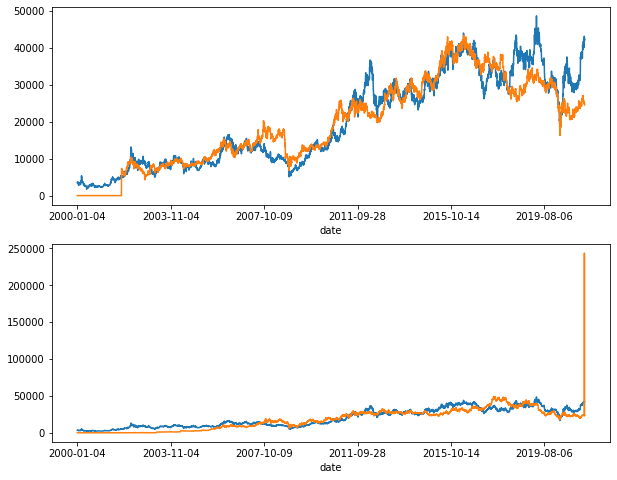

In [38]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
mid_df[20000].plot()
mid_df[35250].plot()

plt.subplot(212)
mid_df[20000].plot()
mid_df[1450].plot()

In [39]:
item_ed_df1[35720].sort_values(ascending=True)[1:6]

name
6280    3773041.87
9150    4248212.31
11070   4509176.15
11780   4712979.34
68270   4817038.37
Name: 35720, dtype: float64

<AxesSubplot:xlabel='date'>

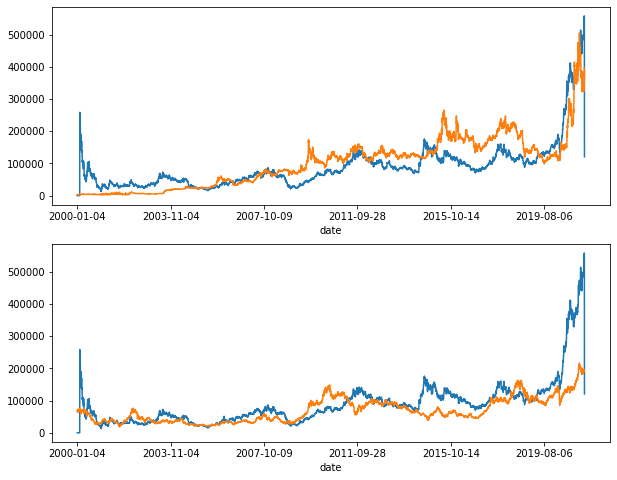

In [40]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
mid_df[35720].plot()
mid_df[6280].plot()

plt.subplot(212)
mid_df[35720].plot()
mid_df[9150].plot()

### 맨해튼 거리

In [41]:
item_mt1 = manhattan_distances(mid_df_T, mid_df_T)
item_mt_df1 = pd.DataFrame(data=item_mt1, index=mid_df.columns, columns=mid_df.columns)
item_mt_df1.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,0.00,185974099.00,504877082.00,216234024.00,228373500.00,242807276.00,183814401.00,162537477.00,89093702.00,220974748.00,...,184165644.00,204332196.00,177613260.00,415384077.00,172268677.00,233651153.00,200785877.00,216569912.00,196846003.00,216241847.00
80,185974099.00,0.00,645947155.00,368879723.00,310880141.00,293865077.00,34368538.00,85161694.00,242640841.00,166623077.00,...,59908041.00,58386247.00,154586511.00,409394728.00,137100928.00,184927304.00,122165128.00,148106187.00,70151954.00,70079798.00
100,504877082.00,645947155.00,0.00,350472482.00,342171094.00,368945836.00,678947979.00,566894457.00,482429534.00,605645258.00,...,683950750.00,704117302.00,624001398.00,689607909.00,644551381.00,608877465.00,632687983.00,718452016.00,696631109.00,716026953.00
120,216234024.00,368879723.00,350472482.00,0.00,249855320.00,297469726.00,392853777.00,320459237.00,189179514.00,376657424.00,...,396390182.00,416556734.00,310265232.00,470052415.00,322374215.00,327029891.00,372502415.00,386637050.00,409070541.00,428466385.00
150,228373500.00,310880141.00,342171094.00,249855320.00,0.00,123879814.00,343643465.00,236071921.00,261951800.00,295566592.00,...,348646236.00,368812788.00,333795218.00,570086877.00,334805235.00,390956953.00,356738035.00,392381482.00,361326595.00,380722439.00
210,242807276.00,293865077.00,368945836.00,297469726.00,123879814.00,0.00,326865901.00,213778673.00,295024672.00,267556690.00,...,331868672.00,352035224.00,323096888.00,565322305.00,313046905.00,370481381.00,358087705.00,362630218.00,344549031.00,363944875.00
240,183814401.00,34368538.00,678947979.00,392853777.00,343643465.00,326865901.00,0.00,114539458.00,231594793.00,195106083.00,...,41887419.00,27234163.00,140412227.00,395287644.00,122763144.00,169698420.00,105952244.00,132620503.00,45984518.00,37078974.00
270,162537477.00,85161694.00,566894457.00,320459237.00,236071921.00,213778673.00,114539458.00,0.00,241280947.00,153091433.00,...,121383079.00,139708781.00,205400207.00,457457924.00,189123824.00,239077400.00,184862992.00,202683483.00,140223718.00,151618432.00


In [42]:
item_mt_df1[20000].sort_values(ascending=True)[1:6]

name
35250   16634539.00
1450    27844283.00
1680    37634867.00
9830    38491049.00
69260   41033688.00
Name: 20000, dtype: float64

<AxesSubplot:xlabel='date'>

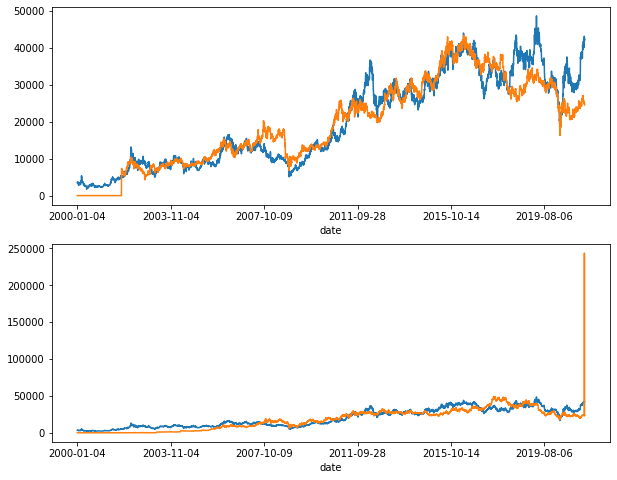

In [43]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
mid_df[20000].plot()
mid_df[35250].plot()

plt.subplot(212)
mid_df[20000].plot()
mid_df[1450].plot()

In [44]:
item_mt_df1[35720].sort_values(ascending=True)[1:6]

name
9150    181308628.00
10950   206448014.00
33780   206622508.00
12750   212371539.00
6280    216209914.00
Name: 35720, dtype: float64

<AxesSubplot:xlabel='date'>

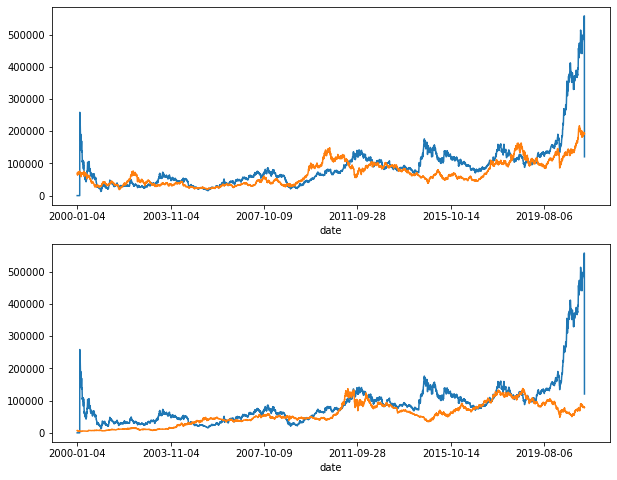

In [45]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
mid_df[35720].plot()
mid_df[9150].plot()

plt.subplot(212)
mid_df[35720].plot()
mid_df[10950].plot()